# Paths Crossover Detection

#### Author: Akhil James

#### Plotting the location history of 2 persons and checking if their paths crossed at the same time.

### 1. Import Libraries and load data

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np

In [0]:
# For privacy reasons, I have deleted these files.
# Use the ones you created using 'Location_history_converter-json_to_excel.ipynb'
aj_url = 'https://github.com/aj7amigo/Crossed_Paths_Tracker/blob/master/AJ_loc.xlsx?raw=true'
ra_url = 'https://github.com/aj7amigo/Crossed_Paths_Tracker/blob/master/RA_loc.xlsx?raw=true'

In [0]:
aj_df = pd.read_excel(aj_url)
ra_df = pd.read_excel(ra_url)
ra_df = ra_df.tail(20)

In [0]:
#convert the date_and_time column into a pandas datetime format
aj_df['date_and_time']  = pd.to_datetime(aj_df['date_and_time'])
ra_df['date_and_time']  = pd.to_datetime(ra_df['date_and_time'])

aj_lat = aj_df['latitude'].values
aj_lon = aj_df['longitude'].values
aj_time = aj_df['date_and_time'].values

ra_lat = ra_df['latitude'].values
ra_lon = ra_df['longitude'].values
ra_time = ra_df['date_and_time'].values

### 2. Configure Basemap

In [0]:
#create map using BASEMAP

# you can get the values of llcrnrlon, llcrnrlat, urcrnrlon and urcrnrlat from https://www.openstreetmap.org
# Click on export and search for your desired area. Click on "Manually select a different area".
# Adjust the rectangle to fit your desired area. The values of latitudes and longitudes will be available in the left window.

#For privacy reasons I have changed values below from my actual values
m = Basemap(llcrnrlon=9.74678,
            llcrnrlat=52.37220,
            urcrnrlon=9.74220,
            urcrnrlat=52.37466,
            )

### 3. Plot the paths

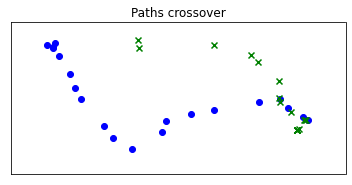

In [6]:
# convert lat and lon to map projection coordinates
lons, lats = m(aj_lon, aj_lat)
# plot aj points as blue dots
m.scatter(aj_lon, aj_lat, marker = 'o', color='b', zorder=5)
# plot ra points as green dots
m.scatter(ra_lon, ra_lat, marker = 'x', color='g', zorder=5)
plt.title('Paths crossover')
plt.show()

### 4. Find the crossover location and time stamp

In [0]:
for x in range (len(aj_df)):
  for y in range (len(ra_df)):
    if (abs(aj_lat[x] - ra_lat[y]) < 0.00003) and (abs(aj_lon[x] - ra_lon[y]) < 0.00003) and ((aj_time[x] - ra_time[y]) <= np.timedelta64(3, 's')):
      print('Latitudes, longitudes and time match at :')
      print(aj_lat[x], aj_lon[x], aj_time[x])
      print(ra_lat[y], ra_lon[y], ra_time[y])
      print('Time diff in sec : ')
      print((aj_time[x] - ra_time[y])/np.timedelta64(1, 's'))

### The results is stored in the results folder of github